In [ ]:
import  pandas as pd 

import sys 
import numpy as np

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostClassifier

import shap

import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("../data/train.csv")
print(df_train.head())

df_test = pd.read_csv("../data/test.csv")
print(df_test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# Look Statistik (all looks fine)
print(df_train.describe())

In [ ]:
# Look Statistik (all looks fine)
print(df_test.describe())

In [ ]:
# Look Statistik (all looks fine)
print(df_train.info())

In [ ]:
# Check null values
print(df_test.info())

In [ ]:


# Print all columns with null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_train.isna().sum().sort_values(ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageQual         81
GarageFinish       81
GarageType         81
GarageYrBlt        81
GarageCond         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Condition2          0
BldgType            0
Neighborhood        0
LandSlope           0
LotConfig           0
Condition1          0
LandContour         0
LotShape            0
Street              0
LotArea             0
MSSubClass          0
MSZoning            0
Id                  0
Utilities           0
HouseStyle          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
BsmtFinSF1          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodA

In [ ]:
# isualizing the patterns of missing value occurrence

#plt.figure(figsize=(8, 2))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xlabel('Feature')
plt.ylabel('Null Indicator')
plt.show()

In [ ]:
msno.matrix(df_train, labels=True)

plt.xlabel('Feature')
plt.ylabel('Null Indicator')
plt.show()

In [ ]:
msno.bar(df_train, fontsize=12, color="seagreen", log=True, sort="descending")

In [ ]:
# Nulity correlation 
# how strongly the presence or absence of one variable affects the presence of another.
msno.heatmap(df_train, cmap="viridis", fontsize=12)

In [ ]:
msno.dendrogram(df_train)

### Columns with many NAN values in train dataset

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
FireplaceQu       730
LotFrontage       227
GarageYrBlt        78
GarageCond         78
GarageFinish       78
GarageQual         78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF1          1
Exterior1st         1

### Columns with many empty values are:
1. PoolQC - 1453 - Pool quality
2. MiscFeature - 1406 - Miscellaneous feature not covered in other categories
3. Alley - 1369 -Type of alley access to property (mayby no access), 
4. Fence - 1179 - Fence quality
5. MasVnrType - 872 - Masonry veneer type
6. FireplaceQu - 690 - Fireplace quality - is NAN if there are no fireplace
7. LotFrontage - 259 - Linear feet of street connected to property
8. GarageQual - 81 - Garage quality
9. GarageFinish - 81 - Interior finish of the garage
10. GarageType - 81 - Garage location
11. GarageYrBlt - 81 - Year garage was built
12. GarageCond - 81 - Garage condition
13. BsmtFinType2 - 38 - Rating of basement finished area (if multiple types)
14. BsmtExposure - 38 - Refers to walkout or garden level walls
15. BsmtCond - 37 - Evaluates the general condition of the basement
16. BsmtQual - 37 - Evaluates the height of the basement
17. BsmtFinType1 - 37 - Rating of basement finished area
18. MasVnrArea - 8 - Masonry veneer area in square feet
19. Electrical - 1 - Electrical system


In [ ]:
# 1. PoolQC
df_train[df_train["PoolQC"].isna()]["PoolArea"].describe()

# Pool Quality is NAN always if there is no pool
# Can it be set "NA	- No Pool"?

In [ ]:
# 2.
# MiscFeature is NAN if (maybe) there is no additional features in the house
# Can it be set to "NA"?

In [ ]:
# 3. Alley
# If Alley is NAN maybe there is no alley to the house
# Can it be set to "NA"?


In [ ]:
# 4. Fence
# IF there is no information about a fence - can one suppose there is no fence?
# Can it be set to "NA"?

In [ ]:
# 6. FireplaceQu
df_train[df_train["FireplaceQu"].isna()]["Fireplaces"].describe()

# Since fireplace quality is NAN if there are no fireplaces
# Can it be set to "NA"?

In [ ]:
# 5. MasVnrType, 18. MasVnrArea
print("\n If there are not zero values of MasVnrArea where MasVnrType = NAN")
print(df_train[df_train["MasVnrType"].isna()]["MasVnrArea"].sort_values(ascending=False))

print("\n Statistics MasVnrArea where MasVnrType = NAN")
print(df_train[df_train["MasVnrType"].isna()]["MasVnrArea"].describe())

print("\n All not zero values of MasVnrArea where MasVnrType = NAN")
# There are 2 Values equal to 1. Is it fine?
print(df_train[df_train["MasVnrType"].isna() & df_train["MasVnrArea"] > 0]["MasVnrArea"])

print("\n All not zero values MasVnrType where MasVnrArea  = 0")
# There are 0 Values of MasVnrArea for given MasVnrType. Is it fine?
print(df_train[df_train["MasVnrArea"] == 0]["MasVnrType"].describe())

# Can MasVnrType be set to "None" if MasVnrArea is NAN or 0 or 1?
# Can MasVnrArea be set to 0, if NAN?

In [ ]:
# 7. LotFrontage
# If there is no footage for the street connected to the property - what to do?
# Min Value is 21.000000. Maybe that means, there is no street connected to the property?
# Can it be?
print(df_train["LotFrontage"].describe())
# Can it be set to 0 if NAN?

In [ ]:
# 8. GarageQual 
# 9. GarageFinish 
# 10. GarageType 
# 11. GarageYrBlt
# 12. GarageCond 

# Columns 8 - 12 are null if there is no Garage

print(df_train[df_train["GarageQual"].isna()][["GarageCars", "GarageArea"]].describe())

# if there is no garage hte columns 8 - 12 will be NAN
print(df_train[df_train["GarageCars"] == 0]["GarageQual"].describe())

# Can it be set to GarageQual = NA
#                  GarageFinish = NA
#                  GarageType = NA
#                  GarageCond = NA
#                  GarageYrBlt = ????????????
# if GarageCars == 0

In [ ]:
# 13. BsmtFinType2 
# 14. BsmtExposure 
# 15. BsmtCond c
# 16. BsmtQual 
# 17. BsmtFinType1


In [ ]:
clmns_ = ["BsmtQual", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF"]
print(df_train[df_train["BsmtFinType2"].isna()][clmns_].describe())
# BsmtFinType2 can be set to "NA", if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?

print(df_train[df_train["BsmtFinSF1"] == 0]["BsmtFinType2"].describe())

In [ ]:
print(df_train[df_train["BsmtExposure"].isna()][clmns_].describe())
# BsmtExposure can be set to "NA", if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?

print(df_train[df_train["BsmtFinSF1"] == 0]["BsmtExposure"].describe())

In [ ]:
print(df_train[df_train["BsmtCond"].isna()][clmns_].describe())
# BsmtCond can be set to "NA", it means TotalBsmtSF == 0

In [ ]:
print(df_train[df_train["BsmtQual"].isna()][clmns_].describe())
# BsmtQual can be set to "NA", it means TotalBsmtSF == 0

In [ ]:
print(df_train[df_train["BsmtFinType1"].isna()][clmns_].describe())

# BsmtFinType1 can be set to "NA", it means that TotalBsmtSF == 0

In [ ]:
# 19. Electrical system - only 1 is null
# This row can be removed

In [6]:
def clean_dataset(data_set):

    # 1. PoolQC: NAN -> "NA"
    data_set["PoolQC"] = data_set["PoolQC"].fillna("NA")
    
    # 2. MiscFeature : NAN -> "NA"
    data_set["MiscFeature"] = data_set["MiscFeature"].fillna("NA")
    
    # 3. Alley : NAN -> "NA" ??????????????
    data_set["Alley"] = data_set["Alley"].fillna("NA")
    
    # 4. Fence : NAN -> "NA" ???????? Or MOD
    data_set["Fence"] = data_set["Fence"].fillna("NA")
    
    # 5. MasVnrType : NAN -> "NA", 18. MasVnrArea : NAN -> 0 ???????? Or MOD
    #MasVnrArea : NAN -> 0 ???????? Or MOD
    data_set["MasVnrArea"] = data_set["MasVnrArea"].fillna(0)

    # MasVnrType: NAN -> "None" if MasVnrArea = NAN or 0 ( or 1)?
    data_set["MasVnrType"] = data_set[data_set["MasVnrArea"].isna() | data_set["MasVnrArea"] == 0]["MasVnrType"].fillna("None")
    # Fill in the rest of MasVnrType with MODE
    data_set["MasVnrType"] = data_set["MasVnrType"].fillna(data_set["MasVnrType"].mode()[0])

    # MasVnrArea: NAN -> 0?
    #data_set["MasVnrArea"] = data_set["MasVnrArea"].fillna(0)
    
    # 6. FireplaceQu : NAN -> "NA"
    data_set["FireplaceQu"] = data_set["FireplaceQu"].fillna("NA")
    
    # 7. LotFrontage : NAN -> 0   ???????????????????? is it fine?
    data_set["LotFrontage"] = data_set["LotFrontage"].fillna(0)
    
    # 8. GarageQual : NAN -> "NA"
    # 9. GarageFinish : NAN -> "NA"
    # 10. GarageType : NAN -> "NA"
    # 11. GarageYrBlt : ????????
    # 12. GarageCond  : NAN -> "NA"
    # if GarageCars == 0

    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("GarageQual\n", data_set[data_set["GarageQual"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageFinish\n", data_set[data_set["GarageFinish"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageType\n", data_set[data_set["GarageType"].isna()]["GarageCars"].sort_values(ascending=False))
    print("GarageCond\n", data_set[data_set["GarageCond"].isna()]["GarageCars"].sort_values(ascending=False))

    mean_garage_cars = np.floor(data_set["GarageCars"].mean())
    data_set["GarageCars"] = data_set["GarageCars"].fillna(mean_garage_cars)

    garage_columns = ["GarageQual", "GarageFinish", "GarageType", "GarageCond"]
    
    data_set.loc[data_set.index[data_set["GarageCars"] == 0].tolist(), garage_columns]= "NA"
    
    
    #can one delete "GarageYrBlt" column ?????
    
    # 13. BsmtFinType2 : NAN -> "NA" if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?
    # 14. BsmtExposure: NAN -> "NA" if TotalBsmtSF == 0 or the top if BsmtFinSF1 == 0?
    # 15. BsmtCond : NAN -> "NA" if TotalBsmtSF == 0
    # 16. BsmtQual : NAN -> "NA" if TotalBsmtSF == 0
    # 17. BsmtFinType1: NAN -> "NA" if TotalBsmtSF == 0

    bsmt_columns = ["BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1"]
    data_set.loc[data_set.index[data_set["TotalBsmtSF"] == 0].tolist(), bsmt_columns]= "NA"

    bsmt_columns = ["BsmtFinType2", "BsmtExposure"]
    data_set.loc[data_set.index[data_set["BsmtFinSF1"] == 0].tolist(), bsmt_columns]= "NA"

    data_set["BsmtFinType2"] = data_set["BsmtFinType2"].fillna(data_set["BsmtFinType2"].mode()[0])
    #with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    #    print(data_set[data_set["BsmtFinType2"].isna()][["BsmtFinSF1","TotalBsmtSF"]])

    # 19. Electrical system - row with NAN can be removed
    data_set.drop(data_set[data_set["Electrical"].isna()].index, inplace = True) 




In [7]:
# Clean the train set
df_train_cleaned = df_train.copy()
#print("\nDataset before the cleaning")
#print(df_train_cleaned.describe())


clean_dataset(df_train_cleaned)
print("\nDataset after the cleaning")
print(df_train_cleaned.isna().sum())


# Print all columns with null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df_train_cleaned.isna().sum().sort_values(ascending=False))

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
GarageQual
 39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageCars, Length: 81, dtype: int64
GarageFinish
 39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageCars, Length: 81, dtype: int64
GarageType
 39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageCars, Length: 81, dtype: int64
GarageCond
 39      0
48      0
78      0
88      0
89      0
       ..
1349    0
1407    0
1449    0
1450    0
1453    0
Name: GarageCars, Length: 81, dtype: int64

Dataset after the cleaning
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
Ga

In [ ]:
# Clean the test set
df_test_cleaned = df_test.copy()
#print(df_test_cleaned[df_test_cleaned["GarageFinish"].isna()]["GarageCars"].sort_values(ascending=False))
#print("\nDataset before the cleaning")
#print(df_train_cleaned.describe())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_test_cleaned.isna().sum().sort_values(ascending=False))

clean_dataset(df_test_cleaned)
print("\nDataset after the cleaning")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_test_cleaned.isna().sum().sort_values(ascending=False))

In [ ]:
print(df_train.shape)
print(df_train_cleaned.shape)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train.info())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_train_cleaned.info())

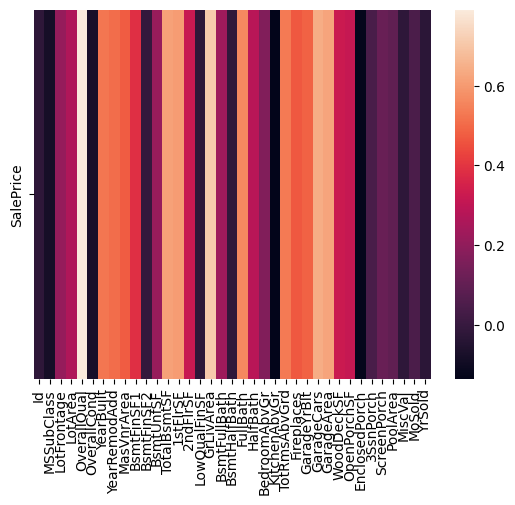

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


In [8]:

# Draw a correlation between numerical features and SalePrice
fig, ax = plt.subplots()

df_correlarion_with_price = df_train_cleaned.select_dtypes(include=np.number)\
                                            .corr()\
                                            .tail(1)\
                                            .drop("SalePrice", axis=1)
sns.heatmap(data=df_correlarion_with_price, 
            ax=ax, 
            xticklabels=True, 
            yticklabels=True)
plt.show()

# High correlation is only positive

# Find column names, which has correlation greater than .6
correlation_min = 0.5
clms_high_correlation = df_correlarion_with_price[df_correlarion_with_price >= correlation_min]\
                            .dropna(how='all', axis=1)\
                            .columns.tolist()

print(clms_high_correlation)
# The following columns have a strong linear impact on the sal price:
#'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea'

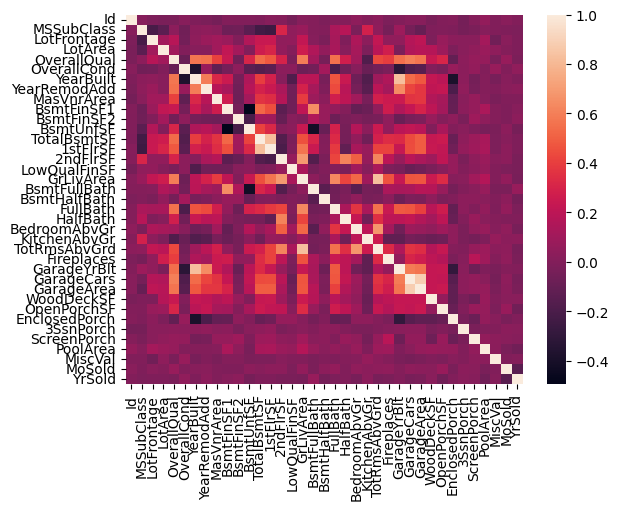

In [9]:
# Check features wihch correlate to each other to reduce features (only numeric features)

df_correlarion_without_price = df_train_cleaned.select_dtypes(include=np.number)\
                                            .drop("SalePrice", axis=1)\
                                            .corr()

fig, ax = plt.subplots()                                        
sns.heatmap(data=df_correlarion_without_price, 
            ax=ax, 
            xticklabels=True, 
            yticklabels=True)
plt.show()

In [10]:
#  Find all pairs where correlation is  between .75 and 1
corr_indexes = df_correlarion_without_price[(df_correlarion_without_price > 0.75) & (df_correlarion_without_price < 1)]\
            .dropna(how='all', axis=1)\
            .dropna(how='all')\
            .stack()\
            .index\
            .tolist()
#print(corr_indexes, type(corr_indexes))
#corr_indexes_set = list(map(list,list(map(frozenset, corr_indexes))))
corr_indexes_set = list(map(tuple, set(map(frozenset, corr_indexes))))

print()
print(corr_indexes_set)

# high correlated pairs of features are:
# ('1stFlrSF', 'TotalBsmtSF'), ('GarageYrBlt', 'YearBuilt'), ('GrLivArea', 'TotRmsAbvGrd'), ('GarageArea', 'GarageCars')

# Make a list of features which can be omitted, because correlated feature will be used instead
clms_to_be_omitted = ["1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd", "GarageArea"]
clms_to_be_preserved = ["TotalBsmtSF", "YearBuilt", "GrLivArea", "GarageCars"]

# Features which have impacte on sales price:
# 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 
# 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'

# find clms_to_be_omitted which are in clms_high_correlation
clms_to_replace = set(clms_high_correlation).intersection(set(clms_to_be_omitted))
clms_to_add = [clms_to_be_preserved[clms_to_be_omitted.index(clmn)] for clmn in list(clms_to_replace)]
print(clms_to_replace)
print(clms_to_add)

# That are the numericcolumns which are important for the analysis
clmns_numeric = list(set(clms_high_correlation).union(set(clms_to_add)))
print(clmns_numeric)



[('YearBuilt', 'GarageYrBlt'), ('TotRmsAbvGrd', 'GrLivArea'), ('1stFlrSF', 'TotalBsmtSF'), ('GarageCars', 'GarageArea')]
{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}
['TotalBsmtSF', 'GarageCars', 'GrLivArea']
['OverallQual', 'GarageArea', 'FullBath', 'YearBuilt', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearRemodAdd', '1stFlrSF', 'GrLivArea']


In [11]:
# Now we have to choose categorcal variables which are important for us
df_train_categorical = df_train_cleaned.select_dtypes(exclude=np.number)
print(df_train_categorical.columns.tolist())

print(df_train_categorical.info())


['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   Alley          1459 non-null   object
 3   LotShape       1459 non-null   object
 4   LandContour    1459 non-null   object
 5   Utilities   

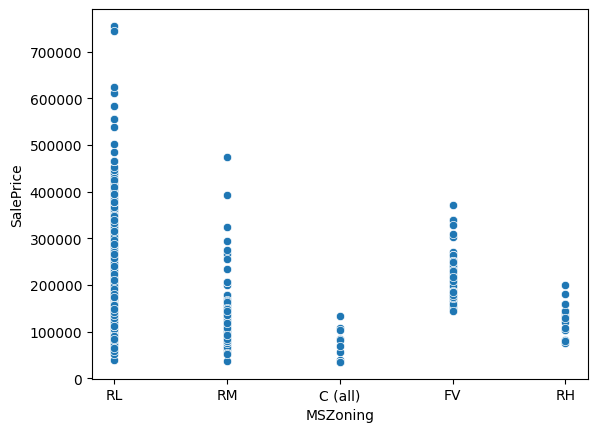

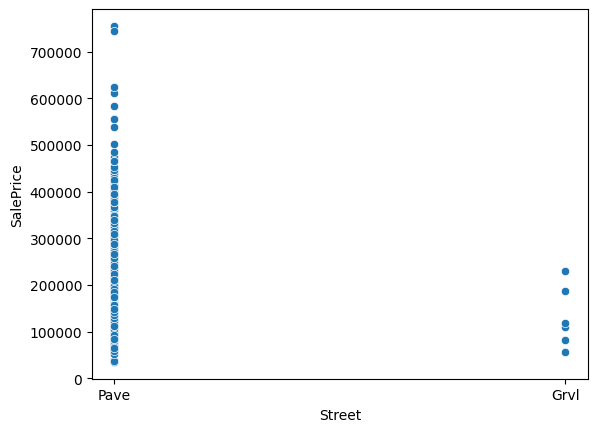

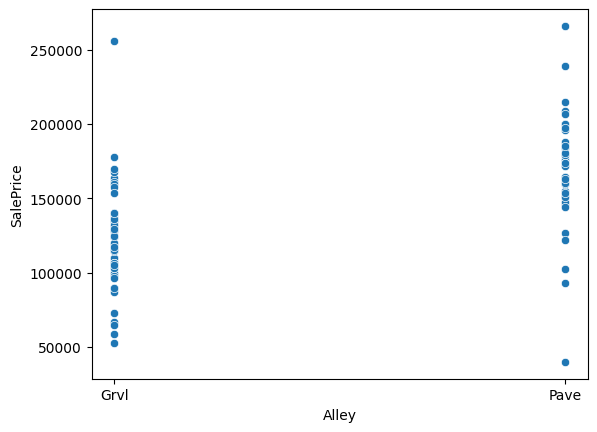

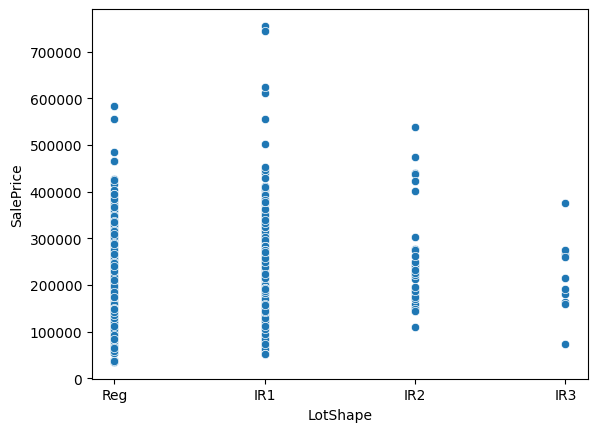

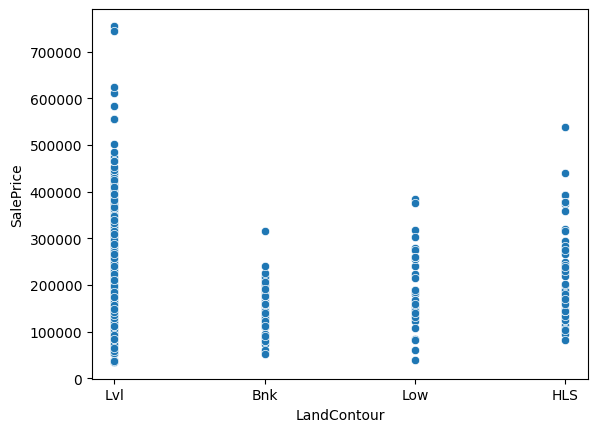

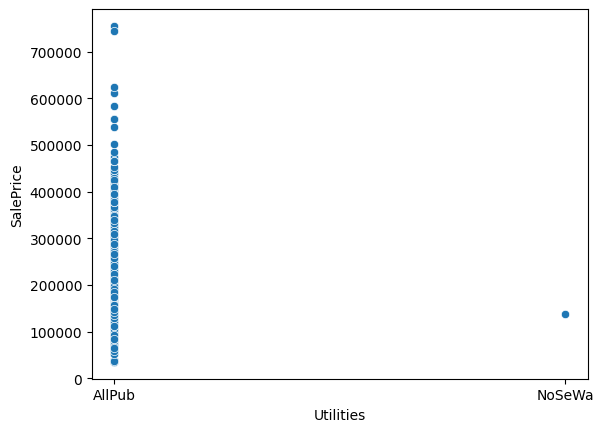

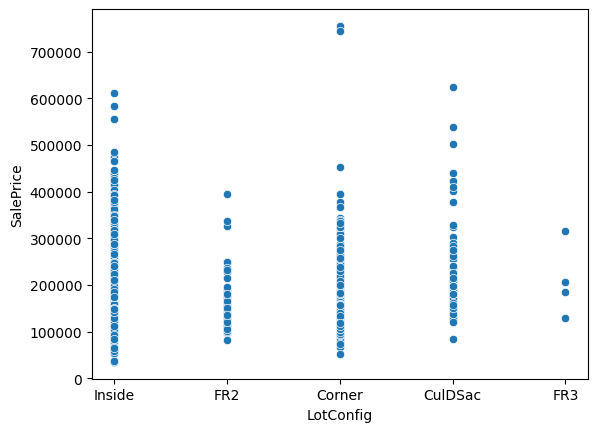

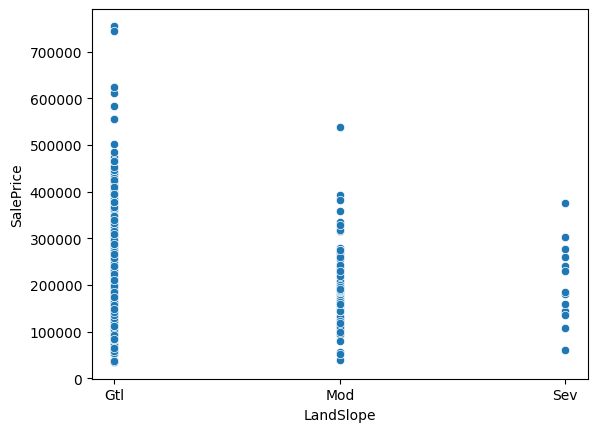

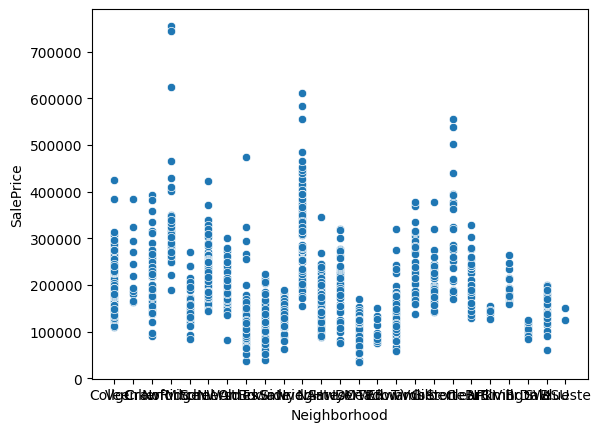

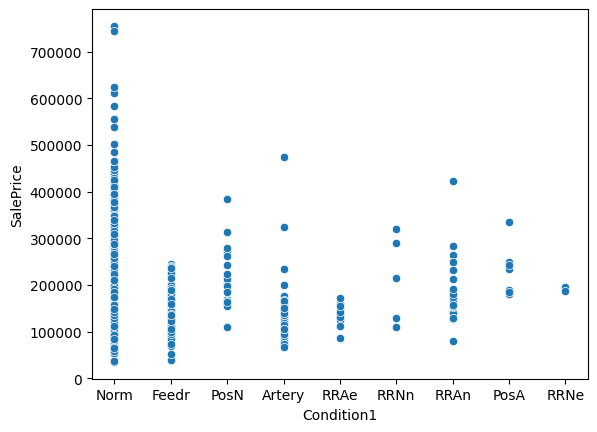

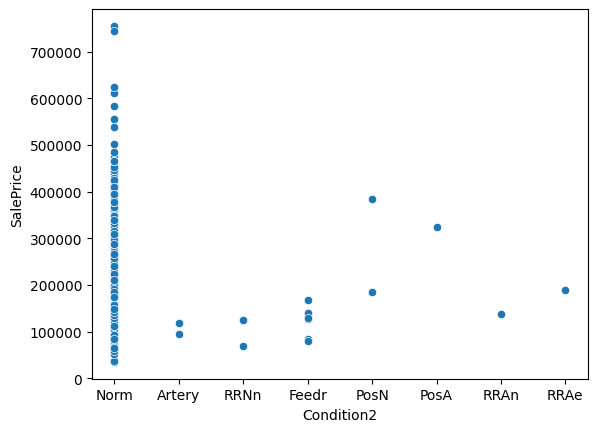

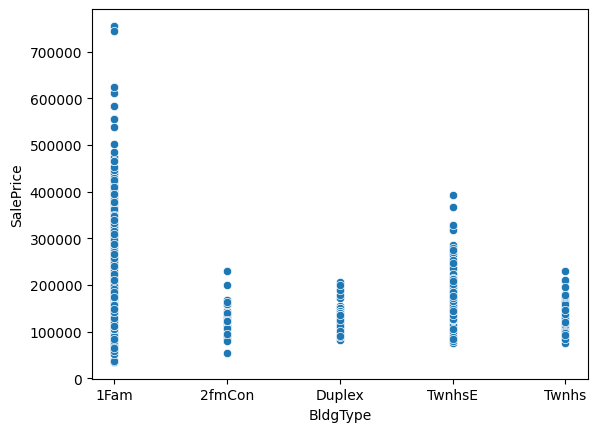

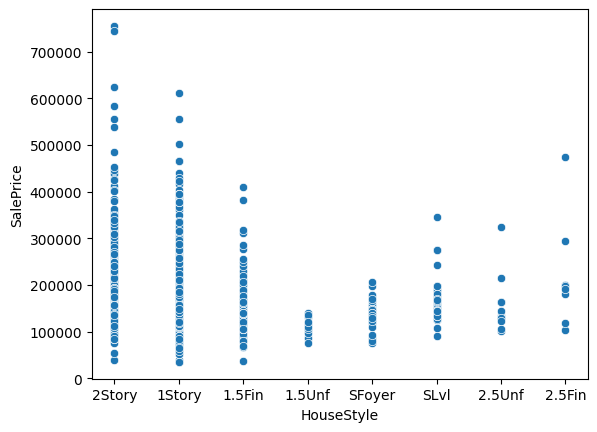

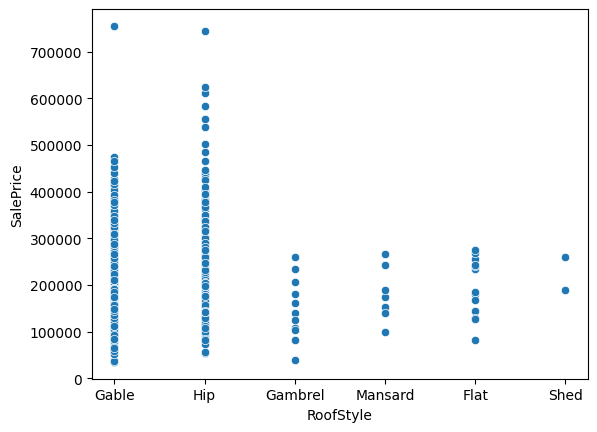

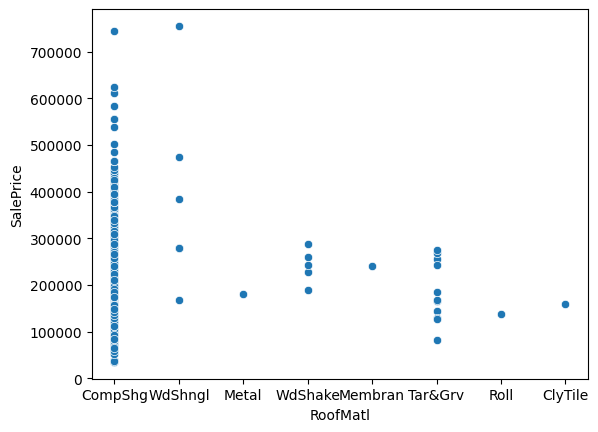

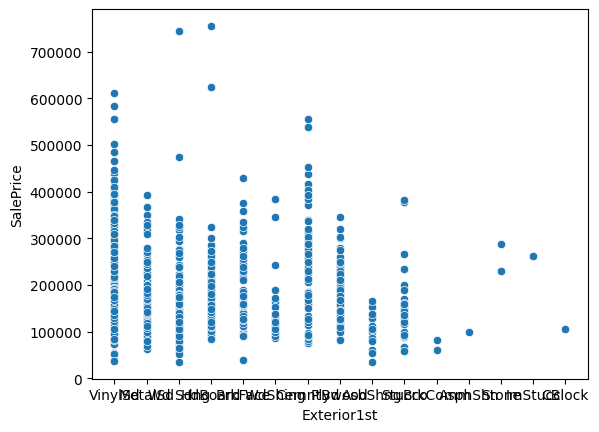

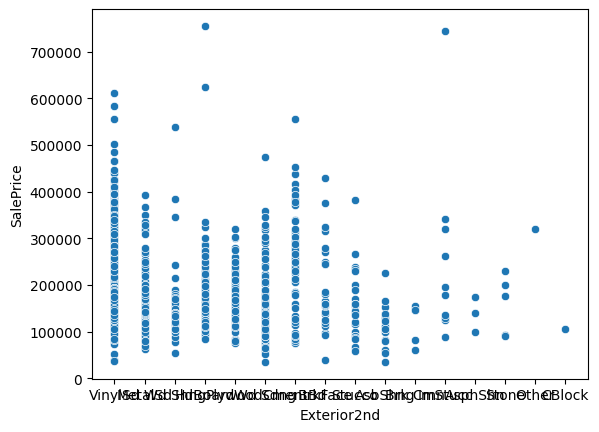

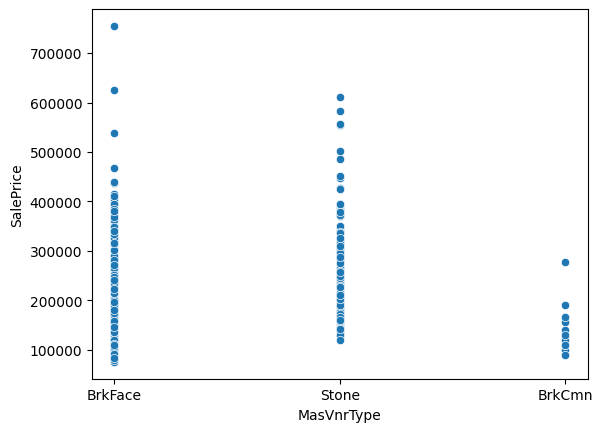

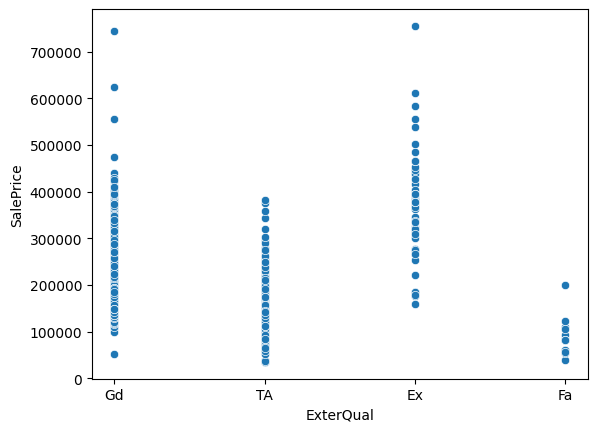

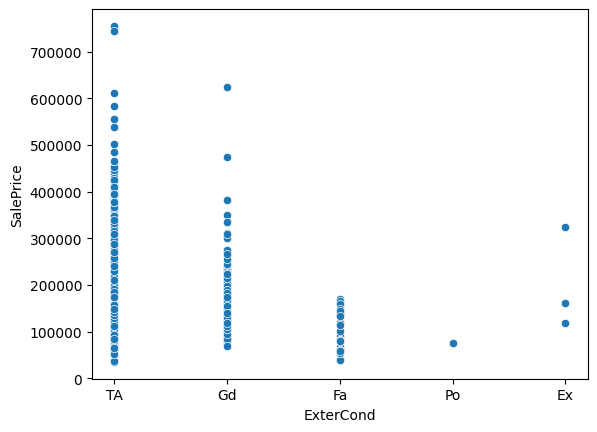

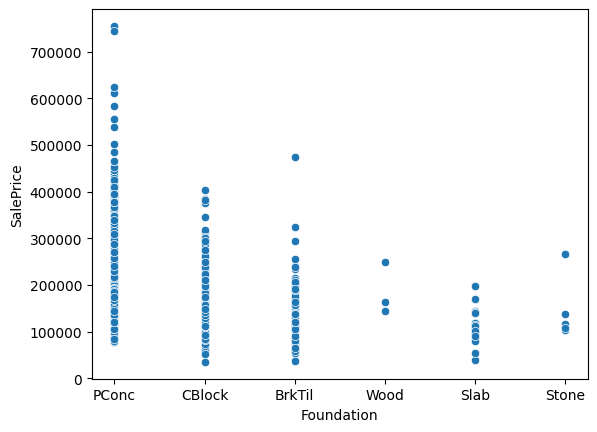

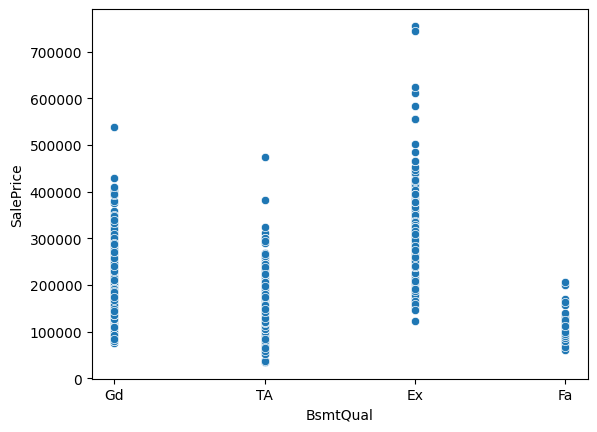

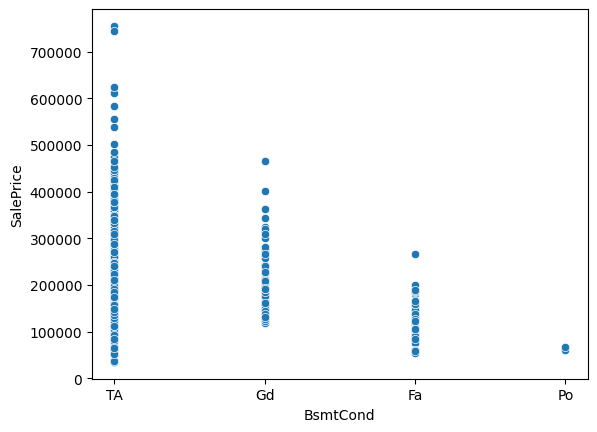

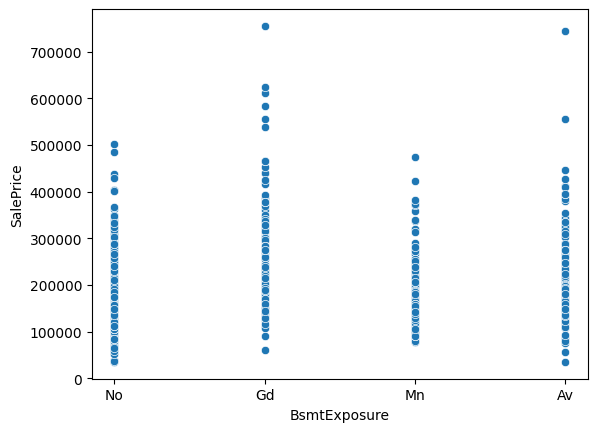

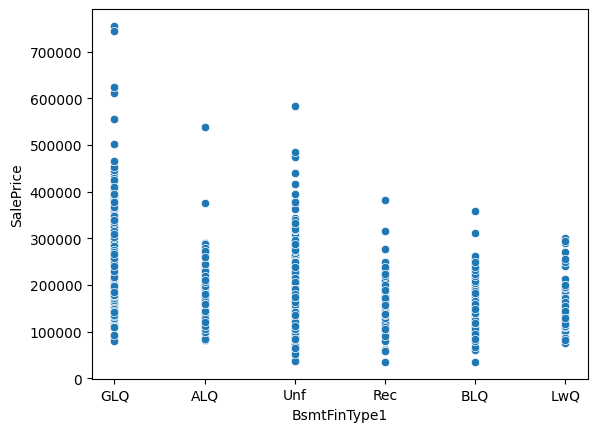

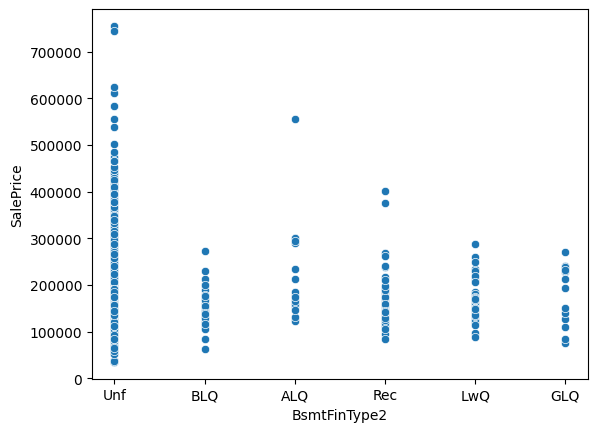

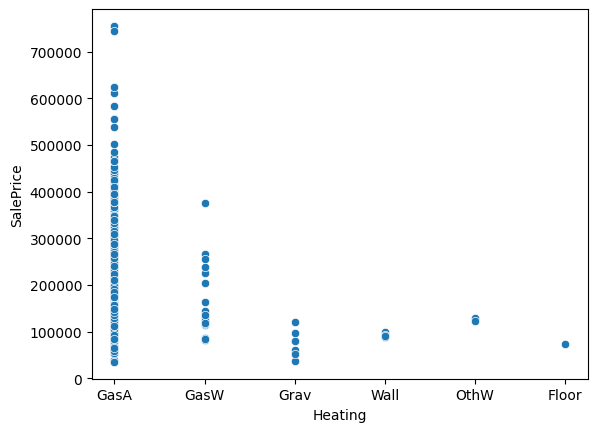

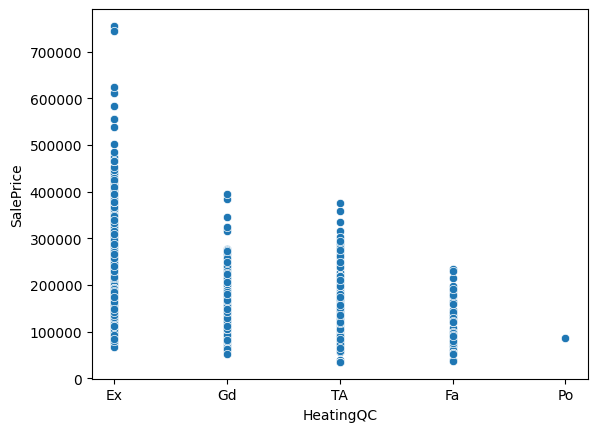

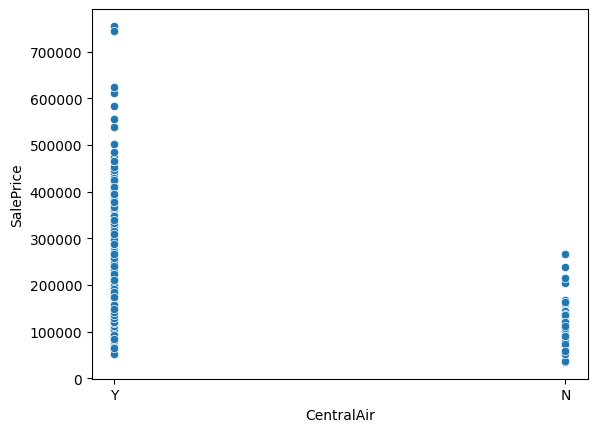

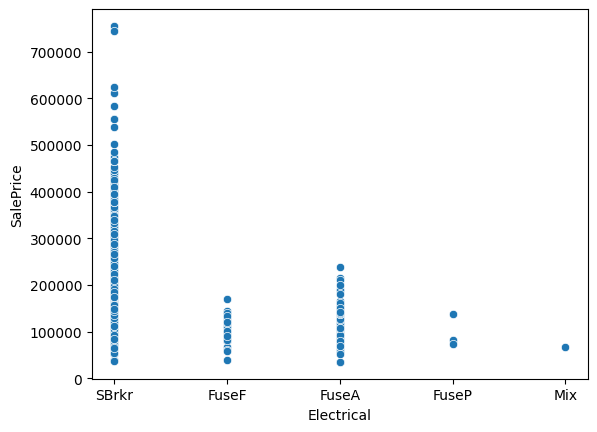

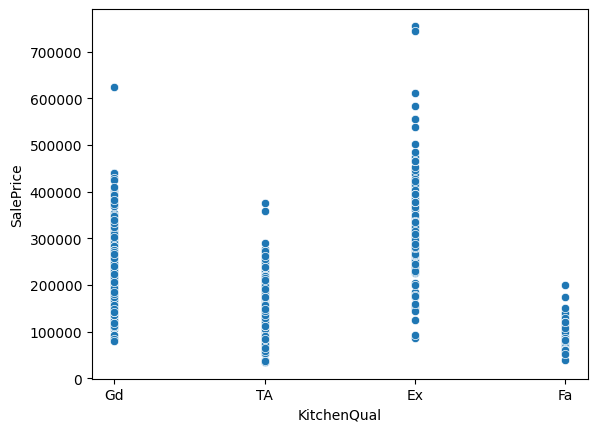

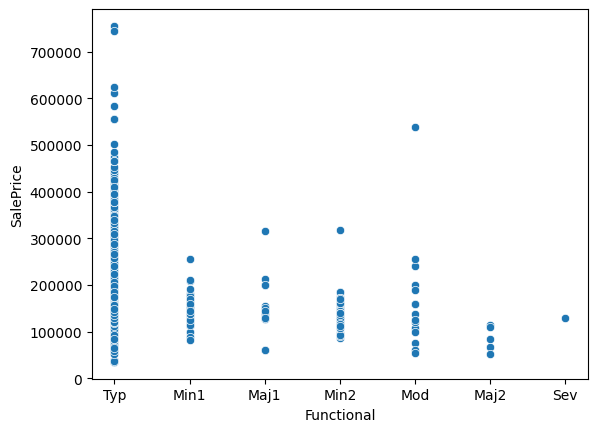

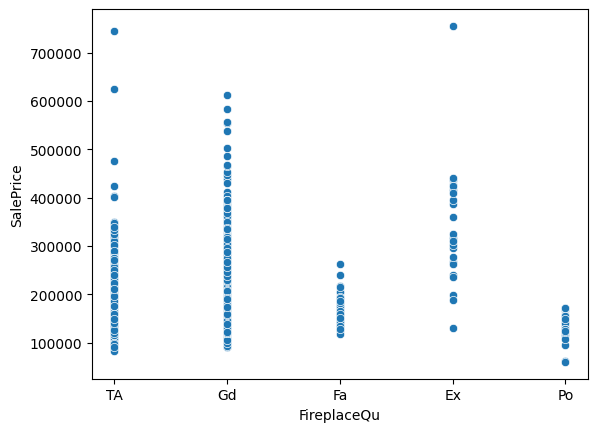

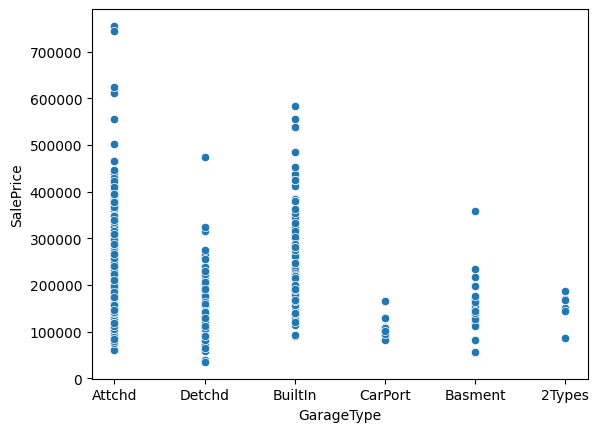

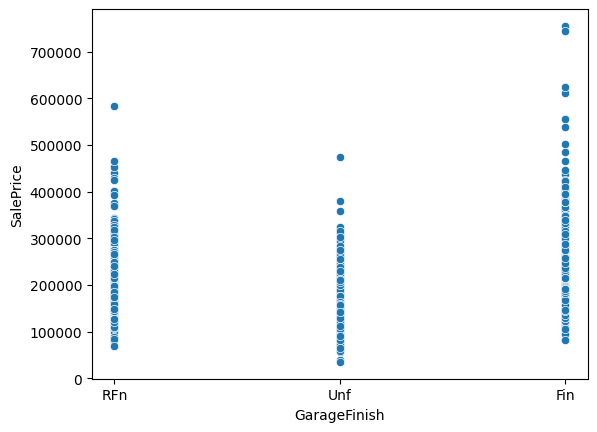

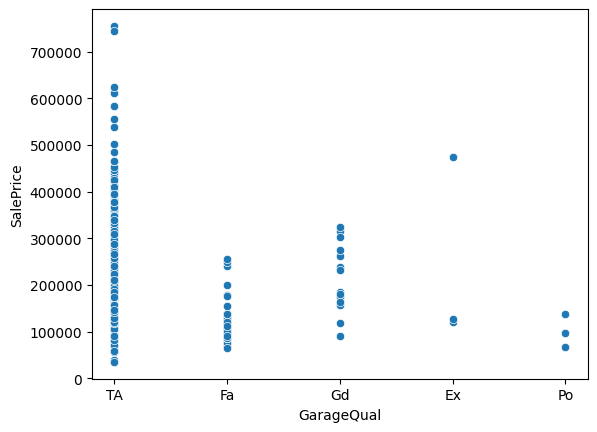

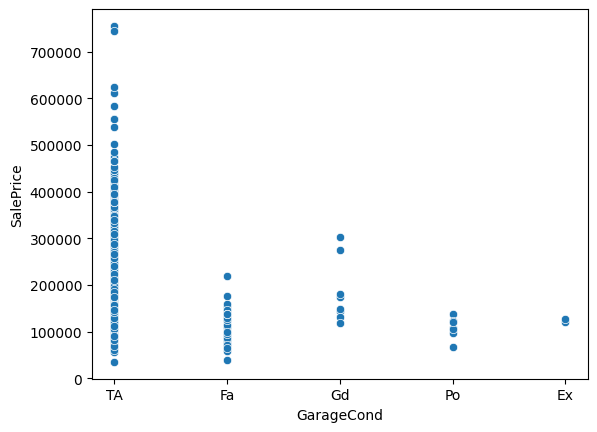

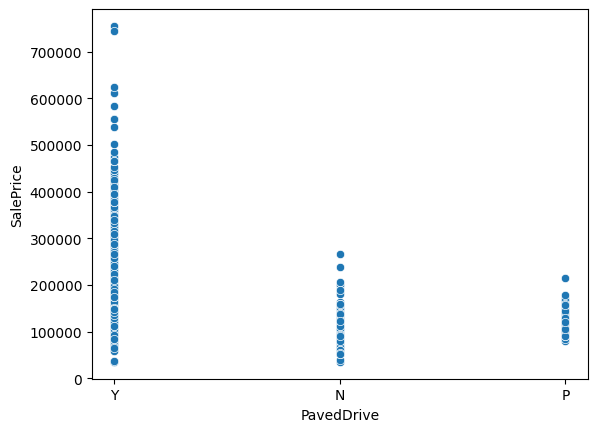

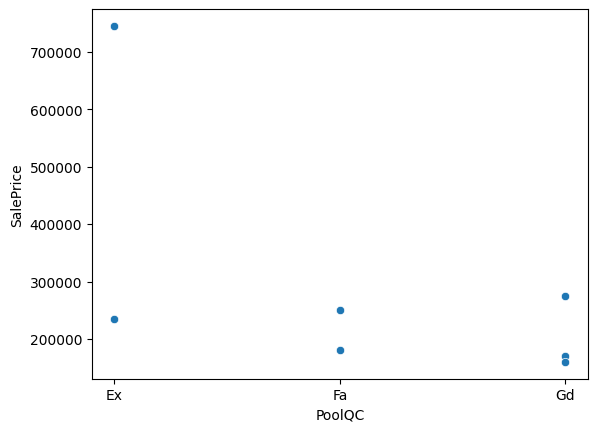

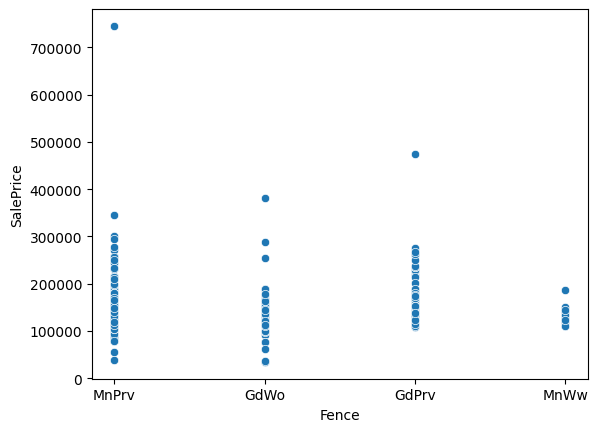

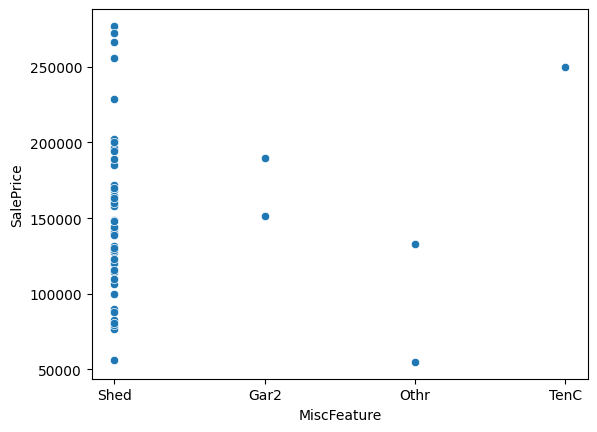

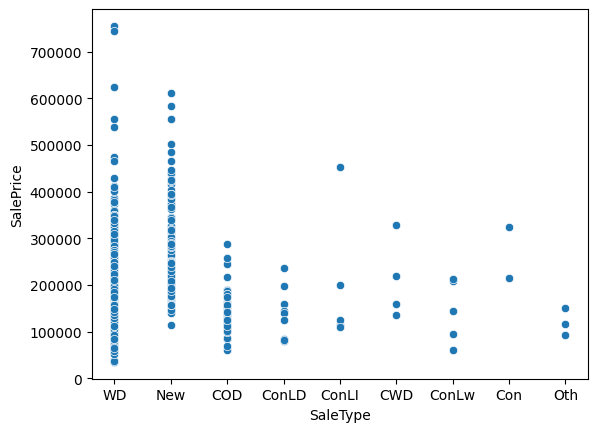

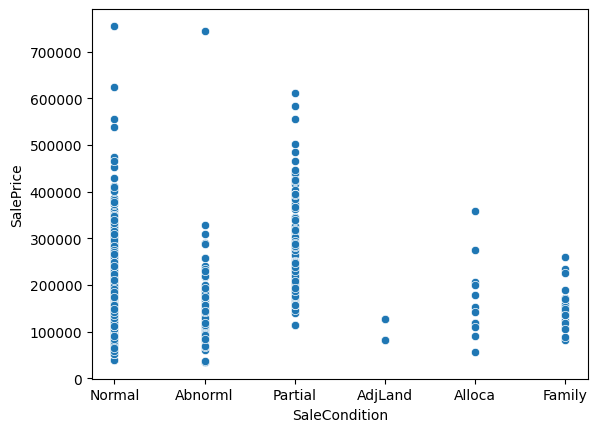

In [ ]:
# Check which features are important according to scklearn
categorical_columns_all = df_train_categorical.columns.tolist()
for categorical_column in categorical_columns_all:
    sns.scatterplot(df_train, x=df_train[categorical_column], y=df_train["SalePrice"])
    plt.show()

In [ ]:


# split data
X_train, X_test, y_train, y_test = train_test_split(
    df_train_cleaned.drop("SalePrice", axis=1), df_train_cleaned["SalePrice"], test_size=0.33, random_state=42)

In [ ]:
print(df_train_cleaned.isna().sum().sort_values(ascending=False))

In [ ]:


cat_Boost_Classifier = CatBoostClassifier(iterations=20,
                                          learning_rate=0.01,
                                          depth=3)

cat_Boost_Classifier.fit(X_train.drop("GarageYrBlt", axis=1), y_train, categorical_columns_all)


c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0:	learn: 6.2157344	total: 1m 29s	remaining: 28m 25s
1:	learn: 6.2122600	total: 3m 2s	remaining: 27m 22s
2:	learn: 6.2092739	total: 3m 28s	remaining: 19m 39s
3:	learn: 6.2062255	total: 5m 4s	remaining: 20m 16s
4:	learn: 6.2032159	total: 6m 36s	remaining: 19m 49s
5:	learn: 6.2000727	total: 8m 9s	remaining: 19m 2s
6:	learn: 6.1970226	total: 9m 42s	remaining: 18m 1s
7:	learn: 6.1939730	total: 11m 17s	remaining: 16m 56s
8:	learn: 6.1912125	total: 12m 59s	remaining: 15m 52s
9:	learn: 6.1876089	total: 14m 41s	remaining: 14m 41s
10:	learn: 6.1845727	total: 16m 22s	remaining: 13m 24s
11:	learn: 6.1817536	total: 18m 3s	remaining: 12m 2s
12:	learn: 6.1787063	total: 19m 45s	remaining: 10m 38s
13:	learn: 6.1747863	total: 21m 22s	remaining: 9m 9s
14:	learn: 6.1709128	total: 22m 55s	remaining: 7m 38s
15:	learn: 6.1680478	total: 24m 28s	remaining: 6m 7s
16:	learn: 6.1650854	total: 26m 2s	remaining: 4m 35s
17:	learn: 6.1620340	total: 27m 33s	remaining: 3m 3s
18:	learn: 6.1588403	total: 29m 5s	remainin

In [23]:
explainer = shap.Explainer(cat_Boost_Classifier)
shap_values = explainer(X_test.drop("GarageYrBlt", axis=1))

c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\akhma\AppData\Local\Temp\ipykernel_28332\744287981.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


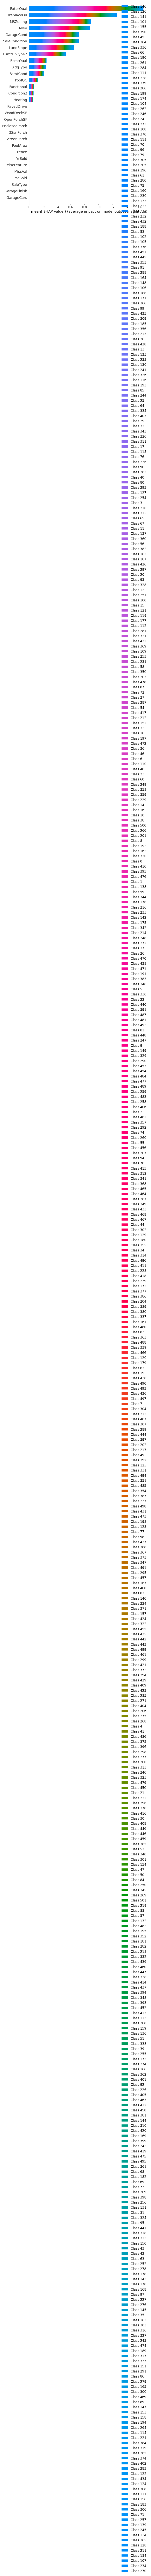

In [35]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_test.drop("GarageYrBlt", axis=1), show=False, max_display=30)

plt.tight_layout()
plt.show()

c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\akhma\AppData\Local\Temp\ipykernel_28332\3026620779.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\akhma\Desktop\Project\.project\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


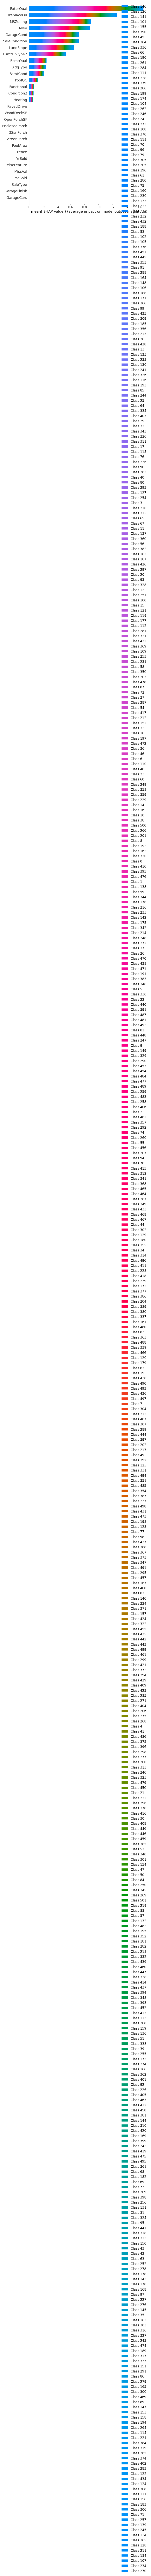

In [37]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, show=False, max_display=30)

plt.tight_layout()
plt.show()

In [ ]:
# One can see that thefollowing categorcal features have influence on the sales price:

# 1. ExterQual - ordinal: PO < FA < TA < Gd < Ex
# 2. FireplaceQu - ordinal: NA < PO < FA < TA < Gd < Ex
# 3. MSZoning - nominal
# 4. Alley - nominal
# 5. GarageCond - ordinal: NA < PO < FA < TA < Gd < Ex
# 6. SaleCondition - nominal
# 7. LandSlope - nominal
# 8. BsmtFinType2 - nominal???

# The others features one can neglect because their impact is small

In [39]:
clmns_categorical = ["ExterQual", "FireplaceQu", "MSZoning",
                     "Alley", "GarageCond", "SaleCondition",
                     "LandSlope", "BsmtFinType2"]

In [20]:
print(shap_values[0, 0])
shap.plots.waterfall(shap_values[0, 0])

.values =
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:


# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)

import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values for a single instance
shap_values = explainer.shap_values(X_test)



# Create the waterfall plot
shap.plots.waterfall(shap_values[0])


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop("SalePrice", axis=1), df_train["SalePrice"], test_size=0.33, random_state=42)

In [ ]:


forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train,y_train)

importance= forest.feature_importances_

sorted_indices = importance.argsort()[::-1]

print(X_train.columns[sorted_indices])

In [40]:
clmns_to_analyse = clmns_numeric + clmns_categorical
df_cleaned_selected_featured = df_train_cleaned[clmns_to_analyse]
print(df_cleaned_selected_featured)

      OverallQual  GarageArea  FullBath  YearBuilt  GarageCars  TotRmsAbvGrd  \
0               7         548         2       2003           2             8   
1               6         460         2       1976           2             6   
2               7         608         2       2001           2             6   
3               7         642         1       1915           3             7   
4               8         836         2       2000           3             9   
...           ...         ...       ...        ...         ...           ...   
1455            6         460         2       1999           2             7   
1456            6         500         2       1978           2             7   
1457            7         252         2       1941           1             9   
1458            5         240         1       1950           1             5   
1459            5         276         1       1965           1             6   

      TotalBsmtSF  YearRemodAdd  1stFlr

In [42]:
# Save the cleaned dataset to train_cleaned.scv file
df_cleaned_selected_featured.to_csv('../data/train_cleaned.csv', index=False)